In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd 

In [24]:
data=pd.read_csv('disaster_data_2017.csv')
df = data[['Name', 'Displacements', 'Start Date']].groupby('Name').sum().reset_index()
df.to_csv('new_disaster_data.csv')

In [5]:
data.head()

,Unnamed: 0,ISO3,Name,Year,Start Date,Event Name,Hazard Category,Hazard Type,Displacements
0,55,AFG,Afghanistan,2017,7/8/17,Afghanistan: flood - Badakshan - 08/07/2017,Weather related,Flood,141.0
1,56,AFG,Afghanistan,2017,3/4/17,Afghanistan: landslide - Ghazni - 04/03/2017,Weather related,Wet mass movement,7.0
2,57,AFG,Afghanistan,2017,4/10/17,Afghanistan: heavy rainfall and flood - Badakh...,Weather related,Flood,4447.0
3,58,AFG,Afghanistan,2017,4/18/17,Afghanistan: landslide - Badakhshan - 18/04/2017,Weather related,Wet mass movement,89.0
4,59,AFG,Afghanistan,2017,12/14/17,Afghanistan: heavy rainfall and floods - Laghm...,Weather related,Flood,30.0


In [25]:
g = df.nlargest(5, 'Displacements')
g

,Name,Displacements
22,China,4473319.0
92,Philippines,2528620.0
27,Cuba,1738000.0
126,United States,1685796.0
51,India,1345994.0


Text(0.5, 1.0, 'Top 5 Countries with Highest Displacements')

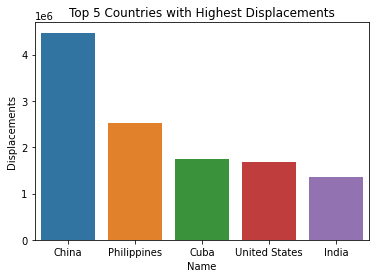

In [26]:
sns.barplot(x='Name', y='Displacements', data=g).set_title('Top 5 Countries with Highest Displacements')

Text(0.5, 1.0, 'Top 5 Hazard Types that cause Displacements')

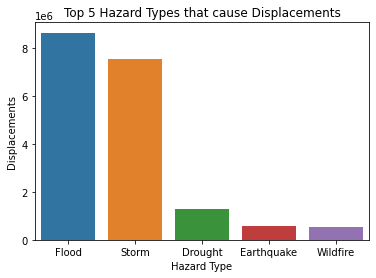

In [27]:
bar_data = data[['Hazard Type', 'Displacements']].groupby('Hazard Type').sum().reset_index()
h = bar_data.nlargest(5, 'Displacements')
sns.barplot(x='Hazard Type', y='Displacements', data=h).set_title('Top 5 Hazard Types that cause Displacements')

In [28]:
data_3=pd.read_csv('refugee.csv')
df_3 = data_3[['Geographic area', 'OBS_VALUE']].groupby('Geographic area').sum().reset_index()
df_3

,Geographic area,OBS_VALUE
0,Afghanistan,2624
1,Albania,12
2,Algeria,4
3,Andorra,<1
4,Angola,8
...,...,...
192,Venezuela (Bolivarian Republic of),9
193,Viet Nam,334
194,Yemen,24
195,Zambia,<1


In [27]:
sns.barplot(x='Geographic area', y='OBS_VALUE', data=df_3)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [24]:
foo = refugee.explode('OBS_VALUE')
foo['OBS_VALUE'] = foo['OBS_VALUE'].astype('float')

ValueError: could not convert string to float: '<1'

In [21]:
data_4 = pd.read_csv('refugee_under18.csv')
data_4.head()
df_4 = data_4[['Geographic area', 'OBS_VALUE']].groupby('Geographic area').sum().reset_index()
df_4

,Geographic area,OBS_VALUE
0,Afghanistan,49
1,Albania,30
2,Algeria,20
3,Andorra,<1
4,Angola,34
...,...,...
192,Venezuela (Bolivarian Republic of),29
193,Viet Nam,15
194,Yemen,39
195,Zambia,20


In [64]:
disaster = pd.read_csv('new_disaster_data.csv').dropna()#merged data set with the refugee data 
disaster

,Unnamed: 0,Name,Year,Displacements,under_18,over_18
0,0,Afghanistan,2017,26871,49.0,51.0
1,1,Albania,2017,3508,30.0,70.0
2,2,Angola,2017,13923,34.0,66.0
5,5,Argentina,2017,26764,17.0,83.0
6,6,Australia,2017,30939,75.0,15.0
...,...,...,...,...,...,...
129,129,Venezuela,2017,2076,29.0,71.0
130,130,Viet Nam,2017,633463,15.0,85.0
132,132,Yemen,2017,13,39.0,61.0
133,133,Zambia,2017,2823,20.0,80.0


Text(0.5, 1.0, 'Top Countries with refugees under 18')

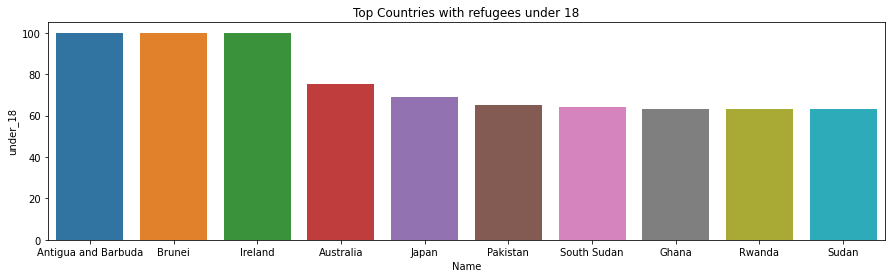

In [63]:
plt.figure(figsize=(15,4))
sns.barplot(x='Name', y='under_18', 
            data=disaster.nlargest(10, 'under_18')).set_title('Top Countries with refugees under 18')

Text(0.5, 1.0, 'Top Countries with refugees over 18')

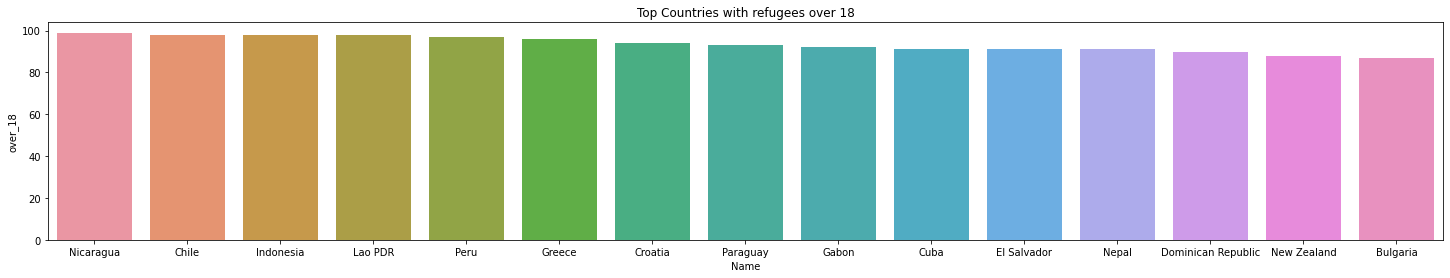

In [69]:
plt.figure(figsize=(25,4))
sns.barplot(x='Name', y='over_18', 
            data=disaster.nlargest(15, 'over_18')).set_title('Top Countries with refugees over 18')

In [8]:
data_5 = pd.read_excel('missing_migrants.xlsx')
df_5 = data_5[['Region of Incident', 'Number Dead']].groupby('Region of Incident').sum().reset_index()

In [12]:
data_5.head()

,Web ID,Cause of Death,Region of Origin,Nationality,Number Missing,Number Dead,Region of Incident,Reported Date,Source,Source Reliability,Latitude,Longitude
0,44369,Mixed,NaN,Mixed,NaN,48.0,US-Mexico Border,31/12/2017,Webb County Office of the Medical Examiner,Verified,27.817449,-99.012893
1,44370,Mixed,NaN,Mixed,NaN,3.0,US-Mexico Border,31/12/2017,Webb County Office of the Medical Examiner,Verified,26.973076,-99.101350
2,44371,Mixed,NaN,Mixed,NaN,2.0,US-Mexico Border,31/12/2017,Webb County Office of the Medical Examiner,Verified,26.995506,-98.748117
3,44372,Unknown,NaN,Unknown,NaN,1.0,US-Mexico Border,31/12/2017,Webb County Office of the Medical Examiner,Verified,29.868768,-101.161736
4,44373,Mixed,NaN,Mixed,NaN,2.0,US-Mexico Border,31/12/2017,Webb County Office of the Medical Examiner,Verified,28.275892,-99.101350


Text(0.5, 1.0, 'Regions with highest number of deaths')

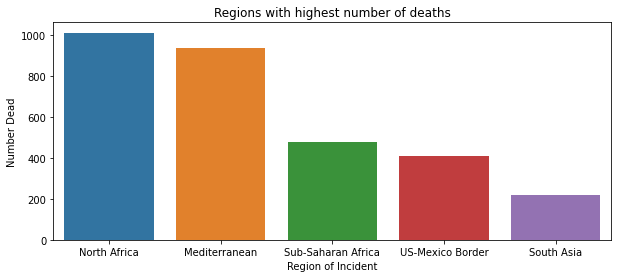

In [10]:
plt.figure(figsize=(10,4))
sns.barplot(x='Region of Incident', y='Number Dead', 
            data=df_5.nlargest(5, 'Number Dead')).set_title('Regions with highest number of deaths')

In [17]:
p = data_5[['Number Dead', 'Cause of Death']].groupby('Cause of Death').sum().reset_index()

Text(0.5, 1.0, 'Highest Causes of Death')

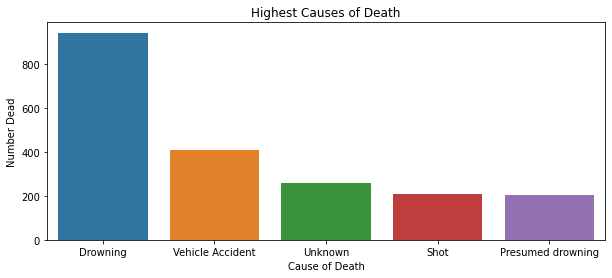

In [20]:
plt.figure(figsize=(10,4))
sns.barplot(x='Cause of Death', y='Number Dead', 
            data=p.nlargest(5, 'Number Dead')).set_title('Highest Causes of Death')

In [ ]:
#There was no correlation with the coutries that had the highest number of deaths and the countries with the highest displacements
#The range for refugee deaths over 18 were relatively the same for the top 10 countries however for under 18 the top three countries had the highest rates. 
#Number of Deaths per month: 
    #September:442
    #June:428
    #October: 397
    #November: 338
    #December: 321 
    #January: 315 
    #May: 310
    #July: 300
    #August: 274
    #February: 261
    #March: 202
    #April: 146